In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Exercise 1

# Method 1
This method mainly uses the concatenate() function to combine the 2 images.

In [72]:
img_rgb = cv.imread('dog.jfif')
img_gray = cv.cvtColor(img_rgb.copy(), cv.COLOR_BGR2GRAY)
img_grayRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR)

comb_img = np.concatenate((img_rgb,img_grayRGB),axis=1)

cv.imshow('dog', comb_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Method 2
This method duplicates the image and combines them through image slicing.

In [8]:
img_rgb = cv.imread('dog.jfif')
img_gray = cv.cvtColor(img_rgb.copy(), cv.COLOR_BGR2GRAY)
img_grayRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR)

height, width = img_rgb.shape[:2]
new_width = width*2

img_comb = np.zeros((height, new_width, 3), np.uint8)
img_comb[0:height,0:width] = img_rgb
img_comb[0:height,width:] = img_grayRGB

cv.imshow('dog', img_comb)
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 2

In [32]:
# Create a VideoCapture object
cap = cv.VideoCapture('img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    print("Unable to create video")

fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('smaller_img_pexels.mp4', fourcc, 20,(1080//4, 1920//4))
# Read until the video is completed.
while cap.isOpened():
    ret, frame = cap.read()
    
    # if frame is read then ret is True
    if not ret:
        print("Can't receive frame.")
        break
        
    smaller = cv.resize(frame, None, fx = 0.25, fy = 0.25, interpolation = cv.INTER_CUBIC)
    cv.namedWindow('frame',cv.WINDOW_NORMAL)
    cv.imshow('frame', smaller)
    out.write(smaller)
    
    if cv.waitKey(1) & 0xFF == 27:
        break

# destroy the constructor
cap.release()
out.release()
cv.destroyAllWindows()

# Exercise 3

In [45]:
from random import randint
from matplotlib import pyplot as plt

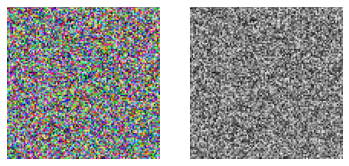

In [75]:
noise_rgb = np.array([[randint(0, 255),randint(0, 255),randint(0, 255)] for i in range(10000)])
rgb =  np.reshape(noise_rgb.astype('uint8'), (100, 100, 3))

gray = cv.cvtColor(rgb.copy(), cv.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(rgb), plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gray, cmap = 'gray'), plt.axis('off')
plt.show()